Завантаження та розпакування даних

In [10]:
# Імпорт бібліотек
import tensorflow as tf
import zipfile
import os

# Завантаження та розпакування набору даних
zip_path = tf.keras.utils.get_file(
    "101_food_classes_10_percent.zip",
    "https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip",
    extract=False
)

# Розпакування
extract_path = os.path.join(os.getcwd(), "101_food_classes_10_percent")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Перевірка структури директорії
for root, dirs, files in os.walk(extract_path):
    print(f"У каталозі {root} є каталоги: {dirs} і файли: {files}")

У каталозі c:\Users\Lenovo\Desktop\study\data science\lab8\101_food_classes_10_percent є каталоги: ['101_food_classes_10_percent', '__MACOSX'] і файли: []
У каталозі c:\Users\Lenovo\Desktop\study\data science\lab8\101_food_classes_10_percent\101_food_classes_10_percent є каталоги: ['test', 'train'] і файли: []
У каталозі c:\Users\Lenovo\Desktop\study\data science\lab8\101_food_classes_10_percent\101_food_classes_10_percent\test є каталоги: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 

Визначення класів 

In [27]:
from pathlib import Path

# Шлях до тренувальних даних
data_dir = Path("101_food_classes_10_percent/train")

# Отримання списку класів
class_names = sorted([item.name for item in data_dir.glob("*") if item.is_dir()])
print("Доступні класи:", class_names)

# Індекси класів для n = 9
n = 9
i1 = n - 1
i2 = n + 29
i3 = n + 59

# Вибір класів
selected_classes = [class_names[i1], class_names[i2], class_names[i3]]
print("Вибрані класи:", selected_classes)


Доступні класи: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'maca

Завантаження вибраних даних

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шляхи до тренувальної і тестової директорій
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

# Генератори даних
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Завантаження даних для вибраних класів
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    classes=selected_classes,  # Тільки вибрані класи
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    classes=selected_classes,
    batch_size=32,
    class_mode="categorical"
)

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Побудова моделі

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Базова модель
base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Заморожування базової моделі

# Нова модель
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(3, activation="softmax")  # 3 класи
])

# Компіляція моделі
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Перегляд структури моделі
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Навчання моделі

In [30]:
# Навчання моделі
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3722 - loss: 1.3201 - val_accuracy: 0.4987 - val_loss: 1.0101
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5375 - loss: 0.8343 - val_accuracy: 0.7000 - val_loss: 0.7623
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7296 - loss: 0.6431 - val_accuracy: 0.7293 - val_loss: 0.6431
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8574 - loss: 0.4619 - val_accuracy: 0.8467 - val_loss: 0.5029
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9194 - loss: 0.3554 - val_accuracy: 0.8653 - val_loss: 0.4347


Візуалізація результатів

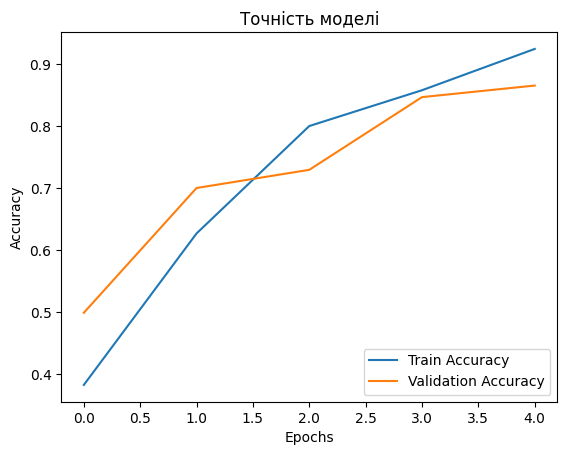

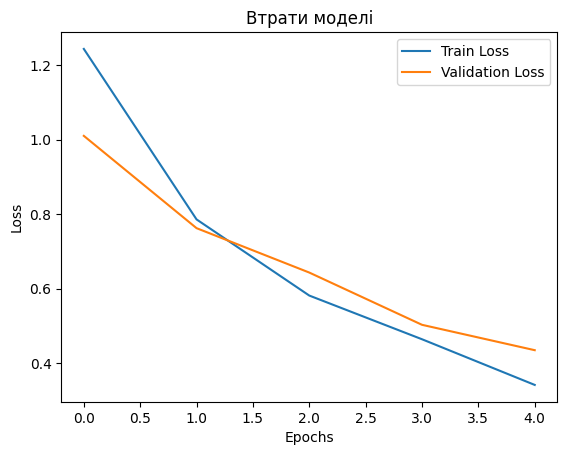

In [31]:
import matplotlib.pyplot as plt

# Графік точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Точність моделі")
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Втрати моделі")
plt.show()

Відображення зображень із вибраних класів

Вибраний клас: bread_pudding


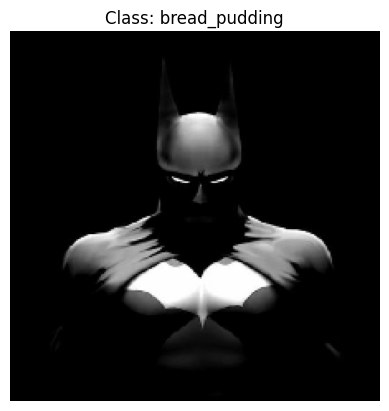

Вибраний клас: fish_and_chips


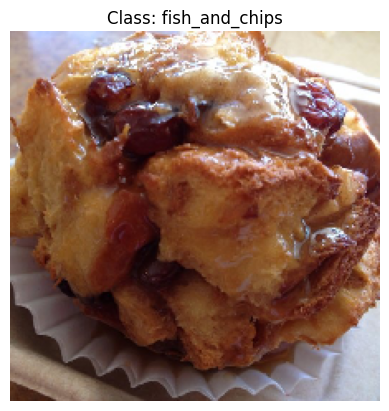

Вибраний клас: onion_rings


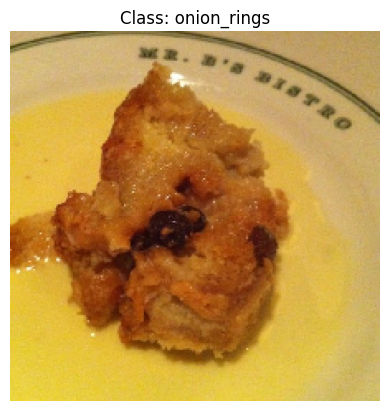

In [32]:
import numpy as np

# Функція для відображення зображень із вибраних класів
def show_random_images_for_classes(classes, class_names, data_generator):
    for class_name in classes:
        print(f"Вибраний клас: {class_name}")
        for images, labels in data_generator:
            plt.imshow(images[0])  # Відображення першого зображення з поточного батчу
            plt.title(f"Class: {class_name}")
            plt.axis('off')
            plt.show()
            break

show_random_images_for_classes(selected_classes, class_names, train_data)